Este colab fue desarrollado por Arnold Charry Armero

# Work-Scheduling Problem

Una oficina de correos requiere diferentes números de empleados a tiempo completo en diferentes días del
semana. El número de empleados a tiempo completo necesarios cada día se indica en la Tabla 4. Sindicato
Las reglas establecen que cada empleado de tiempo completo debe trabajar cinco días consecutivos y luego recibir
dos días libres. Por ejemplo, un empleado que trabaja de lunes a viernes debe estar libre los sábados y domingos. La oficina de correos quiere satisfacer sus necesidades diarias utilizando únicamente empleados de tiempo completo. Formule un LP que la oficina de correos pueda utilizar para minimizar el número de
empleados de tiempo completo que deben ser contratados.

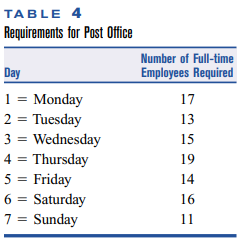

## Conjuntos


$ i = \text{Empleados que comienzan en la franja (dia) } i$

## Parámetros

$ P_{ij} = \textrm{1 si el trabajador } i \textrm{ se encuentra disponible en el momento } j \textrm{, 0 lo contrario.}$

$ D_{i} = \textrm{Números de trabajadores } i \textrm{ necesarios}$

## Variables de decisión

$ x_{i} = \textrm{Trabajadores que comienzan su empleo en la franja } i $

## Función objetivo

$$ \textrm{Min } z = \sum_{i = 1}^{n}x_{i} $$

## Restricciones

Se debe satisfacer la demanda $j$,

$$ \sum_{i = 1}^{n}x_{i} P_{ij} \geq D_{j}, \forall j$$

In [ ]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 25.9 MB/s eta 0:00:00


In [ ]:
#Se importa la libreria
from pulp import *

In [ ]:
#Conjuntos
dia = range(7)
dias = range(7)

In [ ]:
# Parámetros
D = [17, 13, 15, 19, 14, 16, 11]

# Número de empleados
num_empleados = 7
# Número de días en la semana
num_dias = 7

def crear_matriz_turnos(num_dias):
    # Crear una matriz de ceros
    matriz_turnos = [[0 for _ in range(num_dias)] for _ in range(num_dias)]

    # Asignar turnos de trabajo (5 días trabajados, 2 días de descanso)
    for i in range(num_dias):
        # Determinar el inicio del ciclo de trabajo del empleado
        inicio = i % num_dias
        for dia in range(num_dias):
            if (dia >= inicio and dia < inicio + 5) or (inicio + 5 > num_dias and dia < (inicio + 5) % num_dias):
                matriz_turnos[i][dia] = 1

    return matriz_turnos

# Llamar a la función para crear la matriz de turnos
P = crear_matriz_turnos(num_dias)

# Mostrar la matriz
print("---Matriz de Turnos---")
for i in range(num_empleados):
    for j in range(num_dias):
        print(P[i][j], end="  " if P[i][j] >= 0 and P[i][j] < 10 else " ")
    print("")

---Matriz de Turnos---
1  1  1  1  1  0  0  
0  1  1  1  1  1  0  
0  0  1  1  1  1  1  
1  0  0  1  1  1  1  
1  1  0  0  1  1  1  
1  1  1  0  0  1  1  
1  1  1  1  0  0  1  


In [ ]:
# Crear la instancia del modelo
model = LpProblem(name="Work-Scheduling", sense=LpMinimize)

# Inicialización de las variables de decisión
X = LpVariable.dicts("X", (dia), 0, None, LpInteger)

#Función objetivo
model += lpSum([X[i] for i in dia])

# Restricciones
for j in dias:
    model += lpSum([X[i] * P[i][j] for i in dia]) >= D[j]

# Resolver el problema
model.solve()

# Imprimir el estado del problema
print("Status:", LpStatus[model.status])

# Imprimir las variables
for v in model.variables():
    print(v.name, "=", v.varValue)

# Imprimir la función objetivo
print("Trabajadores contratados =", value(model.objective))

Status: Optimal
X_0 = 2.0
X_1 = 6.0
X_2 = 0.0
X_3 = 7.0
X_4 = 0.0
X_5 = 3.0
X_6 = 5.0
Trabajadores contratados = 23.0


In [ ]:
model

Work-Scheduling:
MINIMIZE
1*X_0 + 1*X_1 + 1*X_2 + 1*X_3 + 1*X_4 + 1*X_5 + 1*X_6 + 0
SUBJECT TO
_C1: X_0 + X_3 + X_4 + X_5 + X_6 >= 17

_C2: X_0 + X_1 + X_4 + X_5 + X_6 >= 13

_C3: X_0 + X_1 + X_2 + X_5 + X_6 >= 15

_C4: X_0 + X_1 + X_2 + X_3 + X_6 >= 19

_C5: X_0 + X_1 + X_2 + X_3 + X_4 >= 14

_C6: X_1 + X_2 + X_3 + X_4 + X_5 >= 16

_C7: X_2 + X_3 + X_4 + X_5 + X_6 >= 11

VARIABLES
0 <= X_0 Integer
0 <= X_1 Integer
0 <= X_2 Integer
0 <= X_3 Integer
0 <= X_4 Integer
0 <= X_5 Integer
0 <= X_6 Integer